In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:


# Load parquet files
df = pd.read_parquet('C:/Users/Admin/Downloads/analytics_3714b913_68f5_44eb_8cfc_a3e6955f3ab8.mvt_combo_line.parquet')
#df = pd.read_parquet('analytics_ebaca63c_96a9_490a_a7da_e1eb6f7f3f0c.mvt_combo_line.parquet')
#df = pd.read_parquet('analytics_f3dc8773_d687_47b9_887d_6442c32d155c.mvt_combo_line.parquet')
#df = pd.read_parquet('analytics_fb5f05dd_74c6_41b7_bd8c_16bd1459d40b.mvt_combo_line.parquet')

In [36]:
# Sample the data
#df1 = df1.sample(frac=0.1, random_state=1)
#df2 = df2.sample(frac=0.1, random_state=1)
#df3 = df3.sample(frac=0.1, random_state=1)
#df4 = df4.sample(frac=0.1, random_state=1)

# Concatenate dataframes
#df = pd.concat([df1, df2, df3, df4])

* document_class (3=invoice, 4=return)
* extended_cost (unique cost of item times volume sold, line specific)
* extended_price (line specific, zero means discount or was not tracked)
* item_number (one-to-one mapping to item_description, used for data analysis)
* uofm (unit of measure)

In [37]:
df['date_column'] = pd.to_datetime(df['doc_date'], unit='s')

In [3]:
df.columns

Index(['base_quantity', 'base_unit_cost', 'base_unit_price',
       'customer_account_status', 'customer_class', 'customer_id',
       'customer_name', 'customer_number', 'customer_sales_person_code',
       'customer_sales_person', 'discount', 'discount_amount', 'doc_date',
       'doc_external_id', 'doc_shipto_code', 'doc_shipto_display_name',
       'document_class', 'document_id', 'extended_cost', 'extended_price',
       'external_number', 'item_category_code', 'item_class',
       'item_description', 'item_number', 'item_type', 'item_vendor_item_no',
       'item_vendor_no', 'line_description', 'line_external_id', 'line_id',
       'line_markdown_amount', 'line_shipto_code', 'line_shipto_display_name',
       'line_warehouse_id', 'line_warehouse', 'markdown_percent',
       'price_level_id', 'quantity', 'sales_rep_id', 'sales_rep_name',
       'sales_territory_id', 'sales_territory', 'subtotal',
       'subtotal_net_discount', 'unit_cost', 'unit_price', 'uofm',
       'warehouse_

In [4]:
df.shape

(822531, 50)

In [ ]:
df.

In [5]:
df['date'] = pd.to_datetime(df['doc_date'], unit='s')

In [6]:
df['date'].head()

0   2018-09-28
1   2018-09-28
2   2017-05-17
3   2017-05-17
4   2017-05-17
Name: date, dtype: datetime64[ns]

In [7]:
# Extract year and month from 'converted_date'
df['year_month'] = df['date'].dt.to_period('M')

In [8]:
df['year_month'].head()

0    2018-09
1    2018-09
2    2017-05
3    2017-05
4    2017-05
Name: year_month, dtype: period[M]

In [9]:
# Assuming 'df' has 'year_month', 'document_id', 'base_quantity', and 'subtotal' columns

# Group by 'year_month' and aggregate the unique count of 'document_id', sum of 'base_quantity', and sum of 'subtotal'
aggregated_df = df.groupby('year_month').agg({
    'document_id': pd.Series.nunique,  # Unique count of document IDs (invoices)
    'quantity': 'sum',            # Sum of base quantity
    'subtotal': 'sum'                  # Sum of subtotal
}).reset_index()

# Renaming the columns for clarity
aggregated_df.columns = ['Year-Month', 'Total Invoice', 'Quantity', 'Total Dollar Value']

# Display the first few rows of the aggregated DataFrame
print(aggregated_df.head())

  Year-Month  Total Invoice     Quantity Total Dollar Value
0    2013-01           1639  39069.00000         1095852.69
1    2013-02           1435  33120.00000          881744.75
2    2013-03           1443  41112.00000         1030350.91
3    2013-04           1592  35320.00000         1024949.77
4    2013-05           1680  42051.00000         1437379.71


In [20]:

# Filter data to include only entries from 2017-01 onwards
aggregated_df = aggregated_df[aggregated_df['Year-Month'] >= '2017-01']

# Check the filtered data
print(aggregated_df)

    Year-Month  Total Invoice      Quantity Total Dollar Value
12  2017-01-01           2954  135559.00000         3131689.62
13  2017-02-01           2355  188652.00000         2839562.43
14  2017-03-01           2839  133610.00000         3427511.50
15  2017-04-01           2529  153710.00000         2928509.95
16  2017-05-01           2821  146453.00000         3510588.58
..         ...            ...           ...                ...
100 2024-05-01           3901  223760.00000         5599280.29
101 2024-06-01           3480  101681.00000         4775235.83
102 2024-07-01           3421   77280.00000         5010622.21
103 2024-08-01           3326   84940.00000         5115736.55
104 2024-09-01            373    7374.00000          617523.92

[93 rows x 4 columns]


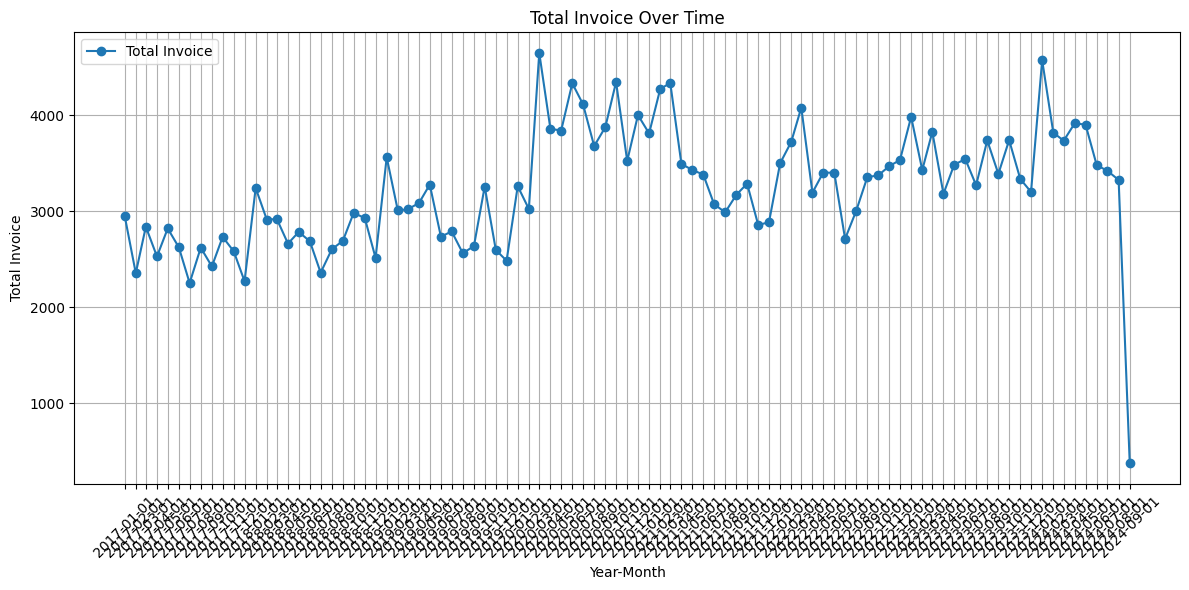

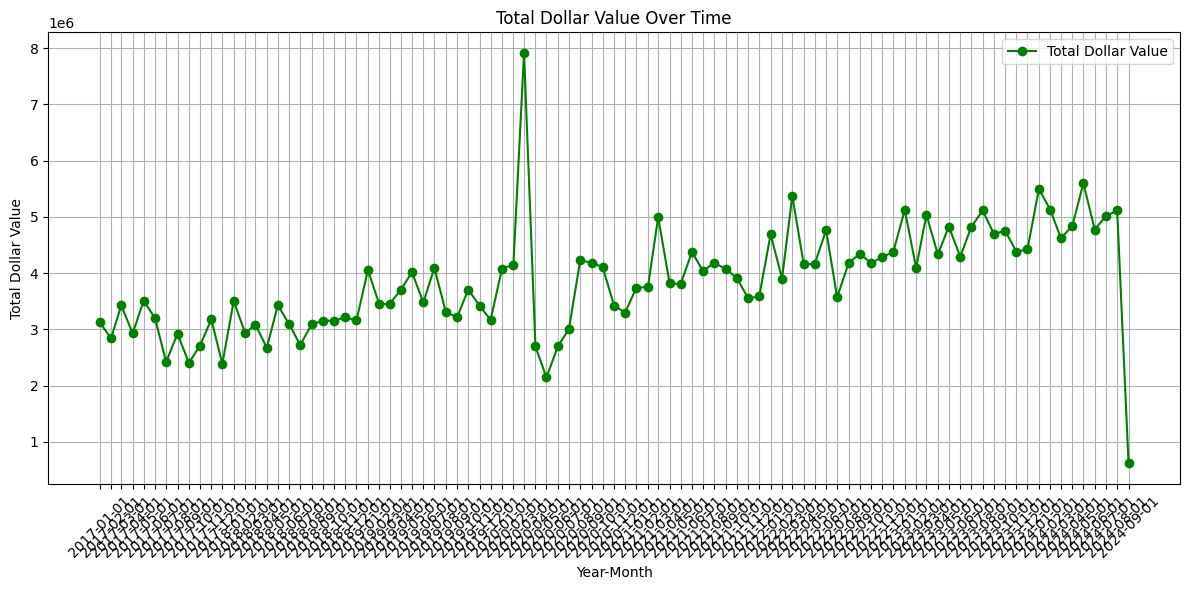

In [21]:
# Plotting the time series for 'Total Invoice'
plt.figure(figsize=(12, 6))
plt.plot(aggregated_df['Year-Month'], aggregated_df['Total Invoice'], marker='o', label='Total Invoice')
plt.title('Total Invoice Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Invoice')
plt.xticks(aggregated_df['Year-Month'], rotation=45)  # Setting xticks from the data
plt.grid(True)
plt.legend()
plt.tight_layout()  # Adjust layout for better fit
plt.show()

# Plotting the time series for 'Total Dollar Value'
plt.figure(figsize=(12, 6))
plt.plot(aggregated_df['Year-Month'], aggregated_df['Total Dollar Value'], marker='o', color='green', label='Total Dollar Value')
plt.title('Total Dollar Value Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Dollar Value')
plt.xticks(aggregated_df['Year-Month'], rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [23]:
pip install statsmodels

  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/59/9a/e466a1b887a1441141e52dbcc98152f013d85076576da6eed2357f2016ae/statsmodels-0.14.4-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for patsy>=0.5.6 from https://files.pythonhosted.org/packages/43/f3/1d311a09c34f14f5973bb0bb0dc3a6e007e1eda90b5492d082689936ca51/patsy-0.5.6-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.8 MB 1.1 MB/s eta 0:00:09
   - -------------------------------------- 0.5/9.8 MB 4.1 MB/s eta 0:00:03
   --- ------------------------------------ 0.9/9.8 MB 5.6 MB/s eta 0:00:02
   ---- ----------------------------------- 1.2/9.8 MB 5.9 MB/s eta 0:00:02
   ------ --------------------------------- 1.5/9.8 MB 5.7 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/9.8 MB 5.7 


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


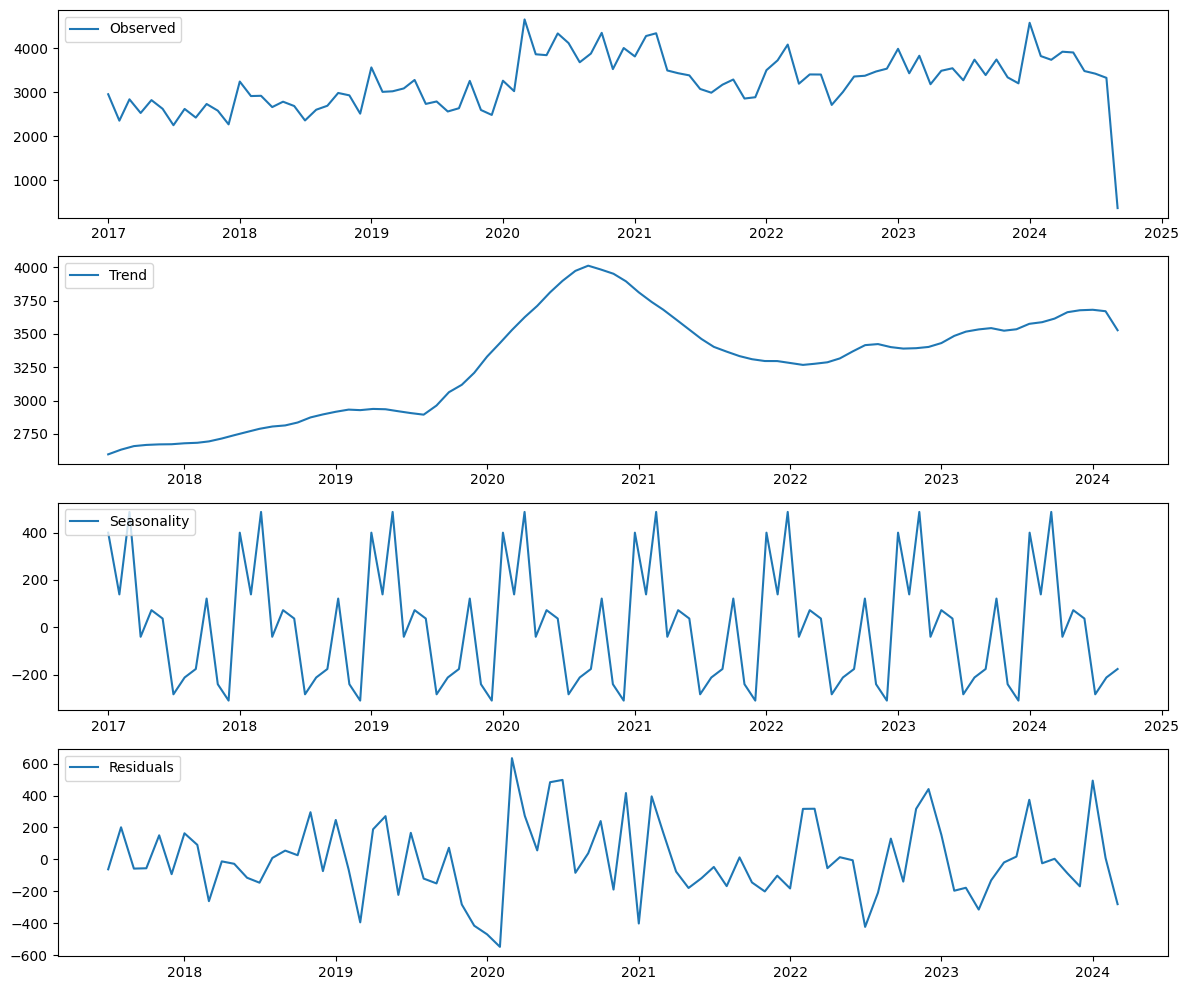

In [24]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Ensure 'Year-Month' is set as the index and is a datetime index
filtered_df['Year-Month'] = pd.to_datetime(filtered_df['Year-Month'])
filtered_df.set_index('Year-Month', inplace=True)

# Specify the frequency (e.g., 12 for monthly data to capture yearly seasonality)
decomposition = seasonal_decompose(filtered_df['Total Invoice'], model='additive', period=12)

# Plot the decomposed components
plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Summary of Insights
Growth and Stabilization: The total invoices showed growth until 2020, after which they stabilized.
Seasonal Patterns: The data exhibits strong seasonality, indicating predictable cycles in invoice values over the year.
Cyclical or Irregular Events: Around 2020, there were notable irregularities (possibly due to external factors like economic changes), which were not fully explained by the trend or seasonality alone.
Recent Stability: Since 2022, the data appears to have reached a stable phase with minor fluctuations, suggesting a more predictable pattern in recent years.

In [26]:
pip install pmdarima


  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/cf/1c/83b87c760144281f0dc4df43578587b59fe3c38f9d660b575adb9480a11a/pmdarima-2.0.4-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/35/00/78ffea3a0ab176267a25ff049518b2582db7ac265bbf27944243d1a81ce2/Cython-3.0.11-cp312-cp312-win_amd64.whl.metadata
   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   - -------------------------------------- 30.7/625.1 kB ? eta -:--:--
   ------------- -------------------------- 204.8/625.1 kB 6.3 MB/s eta 0:00:01
   ---------------------- ----------------- 358.4/625.1 kB 4.5 MB/s eta 0:00:01
   ------------------------------------- -- 583.7/625.1 kB 4.1 MB/s eta 0:00:01
   -----------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
from pmdarima import auto_arima

# Run auto_arima to find the best SARIMA model for your data
# Set seasonal=True for SARIMA and m=12 for monthly data with yearly seasonality
auto_model = auto_arima(filtered_df['Total Invoice'], 
                        seasonal=True, 
                        m=12,                # 12 for yearly seasonality if data is monthly
                        trace=True,          # To print progress
                        suppress_warnings=True, 
                        stepwise=True)       # Use stepwise search to reduce computation time

# Print the summary of the selected model
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1404.940, Time=1.29 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1425.828, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1403.132, Time=0.45 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1405.008, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1424.068, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1413.842, Time=0.02 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=1405.132, Time=0.36 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1405.133, Time=0.30 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1405.207, Time=0.22 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.63 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1410.217, Time=0.12 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=1402.613, Time=0.29 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1412.828, Time=0.50 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=1404.367, Time=0.59 sec
 ARIMA(2,1,0)(1,0,1)[12]

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


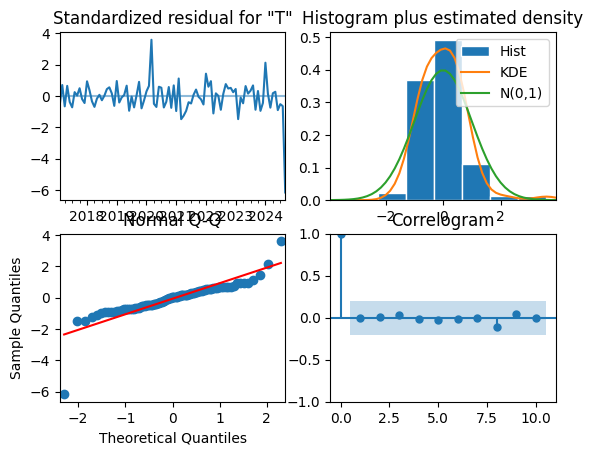

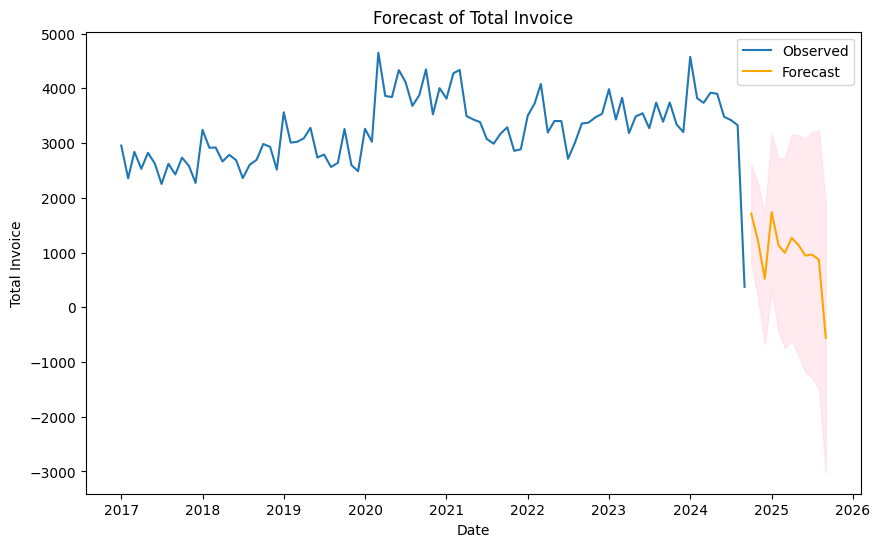

In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Get the best parameters from auto_arima
best_order = auto_model.order  # (p, d, q)
best_seasonal_order = auto_model.seasonal_order  # (P, D, Q, S)

# Define and fit the SARIMA model with the best parameters
model = SARIMAX(filtered_df['Total Invoice'], 
                order=best_order, 
                seasonal_order=best_seasonal_order)
results = model.fit()

# Plot diagnostics to check model fit
results.plot_diagnostics()
plt.show()

# Forecast future values (for example, next 12 months)
forecast = results.get_forecast(steps=12)
forecast_ci = forecast.conf_int()

# Plot the forecast with confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Total Invoice'], label='Observed')
plt.plot(forecast.predicted_mean, label='Forecast', color='orange')
plt.fill_between(forecast_ci.index, 
                 forecast_ci.iloc[:, 0], 
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title("Forecast of Total Invoice")
plt.xlabel("Date")
plt.ylabel("Total Invoice")
plt.legend()
plt.show()


In [29]:
# Define the split point (e.g., last 12 months as test set)
split_point = int(len(filtered_df) * 0.8)  # 80% train, 20% test
train = filtered_df.iloc[:split_point]
test = filtered_df.iloc[split_point:]


In [30]:
from pmdarima import auto_arima

# Find the best SARIMA model for the training set
auto_model = auto_arima(train['Total Invoice'], 
                        seasonal=True, 
                        m=12,                # 12 for yearly seasonality if data is monthly
                        trace=True,          # To print progress
                        suppress_warnings=True, 
                        stepwise=True)

# Print the summary of the selected model
print(auto_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1076.098, Time=3.61 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1104.264, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1076.316, Time=0.24 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1079.403, Time=0.85 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1102.279, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=1083.058, Time=4.00 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=1079.002, Time=2.32 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=1077.830, Time=1.47 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=1079.811, Time=2.28 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1091.236, Time=0.43 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=1082.594, Time=1.20 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=1079.507, Time=2.23 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=1087.576, Time=2.27 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=1075.888, Time=1.22 sec
 ARIMA(1,1,2)(0,0,1

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(0,1,1)(2,0,2)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
                           ^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fi

 ARIMA(0,1,1)(2,0,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(1,0,1)[12]             : AIC=1087.494, Time=0.58 sec
 ARIMA(1,1,1)(1,0,1)[12]             : AIC=1072.544, Time=0.92 sec
 ARIMA(0,1,2)(1,0,1)[12]             : AIC=inf, Time=0.20 sec
 ARIMA(1,1,0)(1,0,1)[12]             : AIC=1073.792, Time=0.27 sec
 ARIMA(1,1,2)(1,0,1)[12]             : AIC=1073.790, Time=0.53 sec

Best model:  ARIMA(0,1,1)(1,0,1)[12]          
Total fit time: 49.676 seconds
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   74
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -531.579
Date:                            Thu, 31 Oct 2024   AIC                           1071.158
Time:                                    19:23:27   BIC                           1080.320
Sample:                                01-01-2017   HQIC                   

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


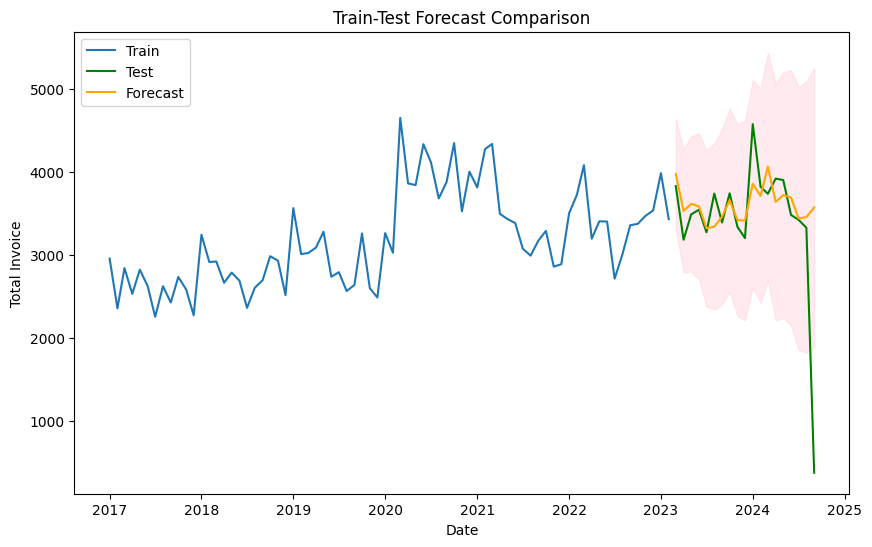

In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

# Extract the best order from auto_arima
best_order = auto_model.order
best_seasonal_order = auto_model.seasonal_order

# Fit the SARIMA model on the training data
model = SARIMAX(train['Total Invoice'], order=best_order, seasonal_order=best_seasonal_order)
results = model.fit()

# Forecast the length of the test set
forecast = results.get_forecast(steps=len(test))
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the actual vs forecasted values
plt.figure(figsize=(10, 6))
plt.plot(train['Total Invoice'], label='Train')
plt.plot(test['Total Invoice'], label='Test', color='green')
plt.plot(forecast_values, label='Forecast', color='orange')
plt.fill_between(forecast_ci.index, 
                 forecast_ci.iloc[:, 0], 
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title("Train-Test Forecast Comparison")
plt.xlabel("Date")
plt.ylabel("Total Invoice")
plt.legend()
plt.show()


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate error metrics
mae = mean_absolute_error(test['Total Invoice'], forecast_values)
rmse = np.sqrt(mean_squared_error(test['Total Invoice'], forecast_values))
mape = np.mean(np.abs((test['Total Invoice'] - forecast_values) / test['Total Invoice'])) * 100

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


Mean Absolute Error (MAE): 354.07993562812743
Root Mean Square Error (RMSE): 775.0229214409135
Mean Absolute Percentage Error (MAPE): 50.086075122780805%


High MAPE (50.09%):

The Mean Absolute Percentage Error (MAPE) of 50.09% suggests that the model’s predictions are, on average, off by 50% relative to the actual values. In forecasting, a MAPE above 20% is generally considered high, and a MAPE above 50% indicates that the model may not be well-suited for capturing the patterns in the data accurately.
This high MAPE indicates the presence of complex patterns, such as irregular cycles, that SARIMA struggles to capture effectively.
Impact of Cyclicity:

The presence of cyclicity in your data (i.e., patterns that occur at irregular intervals rather than fixed seasonal cycles) may be a key reason for the high error rates. SARIMA is typically more suited for regular seasonality, and while it can model some cyclic patterns, it may not fully capture irregular or long-term cycles.
Cyclic patterns often require more flexible or complex models, which can adapt to varying frequencies and amplitudes over time.
Error Metrics and Forecast Reliability:

The high RMSE (775.02) compared to MAE (354.08) indicates that there may be some larger forecast errors in specific time periods. This discrepancy suggests that while the model does reasonably well in some instances, it fails significantly in others, likely due to the cyclic patterns or outliers.
Given these metrics, the current SARIMA model may not be reliable for high-accuracy forecasting over time and may struggle to provide actionable insights based on predicted values.
Next Steps and Model Refinement:

To better capture cyclicity, consider trying a model that can incorporate flexible cycles, such as Prophet with Fourier terms or a machine learning-based model (e.g., LSTM or XGBoost).
If external factors are influencing the cyclicity, integrating relevant exogenous variables (e.g., economic indicators, industry events) into the model may improve forecasting accuracy.
Business Implications:

Due to the high forecast error, any decisions made based on this model's predictions should be approached cautiously. It may be more useful for observing general trends rather than precise forecasting.
Investing in model refinement to handle cyclic patterns effectively can improve forecast accuracy, making the model more suitable for decision-making.

In [36]:
pip install prophet

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/12/ff/a04156f4ca3d18bd005c73f79e86e0684346fbc2aea856429c3e49f2828e/prophet-1.1.6-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/5d/12/6522f3de83ca690aa52f4b8c88a1e203abb1e2d75c31669dc004949143cd/cmdstanpy-1.2.4-py3-none-any.whl.metadata
  Obtaining dependency information for holidays<1,>=0.25 from https://files.pythonhosted.org/packages/98/42/5238e5a623381a51574e3f8d4710a31bff7fe0a580e265c04e82cdc5eb22/holidays-0.59-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/e1/6a/4604f9ae2fa62ef47b9de2fa5ad599589d28c9fd1d335f32759813dfa91e/importlib_resources-6.4.5-py3-none-any.whl.metadata
  Obtaining dependency information for stanio<2.0.0,>=0.4.0 from https://files.pythonhosted.org/packages/56/87/37a80e4d5bd453c33262d8fb618b6840fd98d24ed0

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
pip install pystan

  Obtaining dependency information for pystan from https://files.pythonhosted.org/packages/3f/7f/657d722f81035931513a9760751a215f09fb1474c15c043b5a5ed17e61ca/pystan-3.10.0-py3-none-any.whl.metadata
  Obtaining dependency information for aiohttp<4.0,>=3.6 from https://files.pythonhosted.org/packages/70/9e/5add7e240f77ef67c275c82cc1d08afbca57b77593118c1f6e920ae8ad3f/aiohttp-3.10.10-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for clikit<0.7,>=0.6 from https://files.pythonhosted.org/packages/f2/3d/4394c710b9195b83382dc67bdd1040e5ebfc3fc8df90e20fe74341298c57/clikit-0.6.2-py2.py3-none-any.whl.metadata
INFO: pip is looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
  Obtaining dependency information for pystan from https://files.pythonhosted.org/packages/20/e7/726e923d328524d0151080f5a1d20f57a025b6d2f72a252c2d2d7abe57f9/pystan-3.9.1-py3-none-any.whl.metadata
  Obtaining dependency informat

  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [20 lines of output]
      Traceback (most recent call last):
        File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_for_build_wheel
          return hook(config_settings)
                 ^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\Admin\AppData\Local\Temp\pip-build-env-3qk0hxv_\

In [43]:
filtered_df.head()

,Total Invoice,Quantity,Total Dollar Value
Year-Month,,,
2017-01-01,2954,135559.00000,3131689.62
2017-02-01,2355,188652.00000,2839562.43
2017-03-01,2839,133610.00000,3427511.50
2017-04-01,2529,153710.00000,2928509.95
2017-05-01,2821,146453.00000,3510588.58


In [54]:
print(filtered_df.columns)

Index(['Total Invoice', 'Quantity', 'Total Dollar Value'], dtype='object')


In [56]:
filtered_df = filtered_df.reset_index()

In [57]:
filtered_df.head()

,Year-Month,Total Invoice,Quantity,Total Dollar Value
0,2017-01-01,2954,135559.00000,3131689.62
1,2017-02-01,2355,188652.00000,2839562.43
2,2017-03-01,2839,133610.00000,3427511.50
3,2017-04-01,2529,153710.00000,2928509.95
4,2017-05-01,2821,146453.00000,3510588.58


In [58]:
# Check original columns and rename for Prophet compatibility
filtered_df_prophet = filtered_df.rename(columns={'Year-Month': 'ds', 'Total Invoice': 'y'})

In [59]:
filtered_df_prophet

,ds,y,Quantity,Total Dollar Value
0,2017-01-01,2954,135559.00000,3131689.62
1,2017-02-01,2355,188652.00000,2839562.43
2,2017-03-01,2839,133610.00000,3427511.50
3,2017-04-01,2529,153710.00000,2928509.95
4,2017-05-01,2821,146453.00000,3510588.58
...,...,...,...,...
88,2024-05-01,3901,223760.00000,5599280.29
89,2024-06-01,3480,101681.00000,4775235.83
90,2024-07-01,3421,77280.00000,5010622.21
91,2024-08-01,3326,84940.00000,5115736.55


Index(['ds', 'y', 'Quantity', 'Total Dollar Value'], dtype='object')


19:39:05 - cmdstanpy - INFO - Chain [1] start processing
19:39:06 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


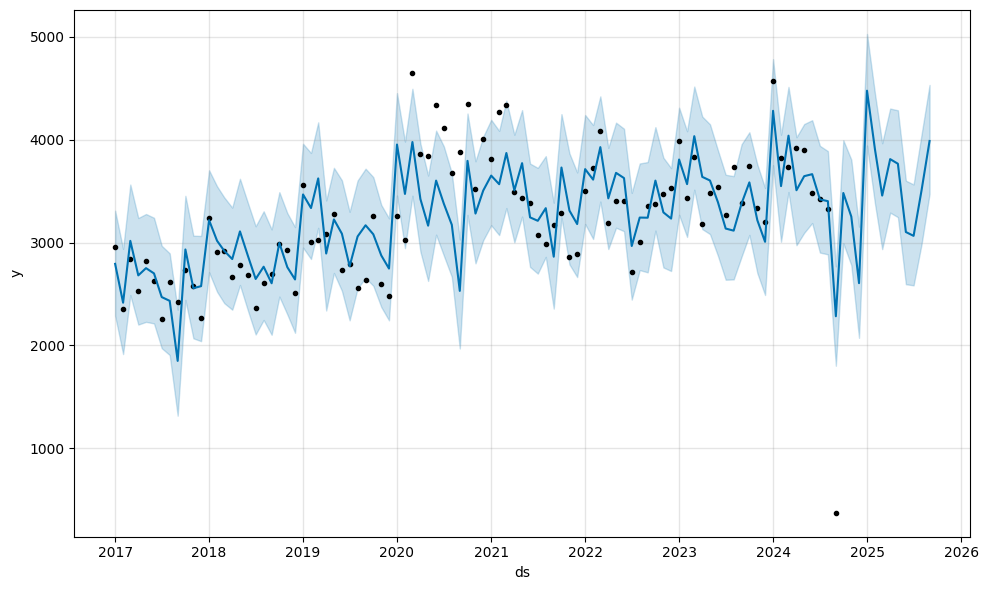

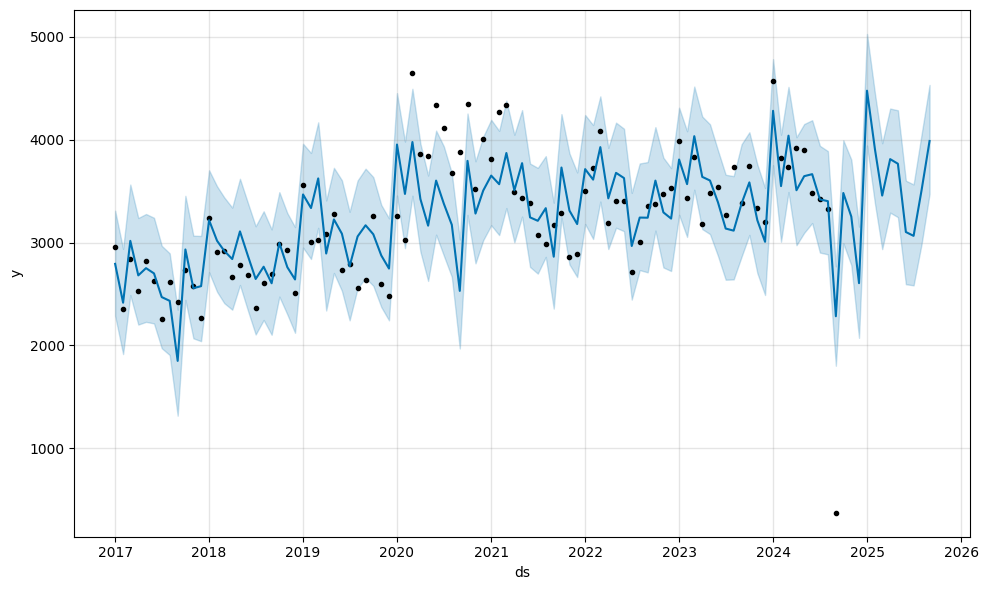

In [60]:


# Verify the column names
print(filtered_df_prophet.columns)  # Ensure it shows 'ds' and 'y'

# Initialize and fit the Prophet model
from prophet import Prophet

model = Prophet(yearly_seasonality=True)
model.add_seasonality(name='multi_year_cycle', period=36, fourier_order=5)

# Fit the model
model.fit(filtered_df_prophet)

# Forecast future values
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)
model.plot(forecast)


In [61]:
# Define the split point (e.g., last 20% as test set)
split_point = int(len(filtered_df_prophet) * 0.8)  # 80% train, 20% test
train = filtered_df_prophet.iloc[:split_point]
test = filtered_df_prophet.iloc[split_point:]


In [62]:
from prophet import Prophet

# Initialize the model
model = Prophet(yearly_seasonality=True)
model.add_seasonality(name='multi_year_cycle', period=36, fourier_order=5)

# Fit the model on the training data
model.fit(train)


19:40:22 - cmdstanpy - INFO - Chain [1] start processing
19:40:23 - cmdstanpy - INFO - Chain [1] done processing


In [63]:
# Create a future dataframe to forecast over the test period
future = model.make_future_dataframe(periods=len(test), freq='M')
forecast = model.predict(future)

# Extract forecasted values for the test period
forecast_test = forecast[['ds', 'yhat']].set_index('ds').loc[test['ds']]


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


KeyError: "None of [DatetimeIndex(['2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',\n               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',\n               '2023-11-01', '2023-12-01', '2024-01-01', '2024-02-01',\n               '2024-03-01', '2024-04-01', '2024-05-01', '2024-06-01',\n               '2024-07-01', '2024-08-01', '2024-09-01'],\n              dtype='datetime64[ns]', name='ds', freq=None)] are in the [index]"